# Analise de sentimento para treinamento de ML
A intenção desse book é carregar diferentes dicionários léxicos para análise de sentimento em portugues e utilizá-los para analisar posts do colab afim de criar um dataset de treinamento para algoritmo de classificação de sentimento.

Os posts analisados serão ordenados por scores (quanto maior, mais positivo o sentimento) e o dataset final será composto por 1000 entradas positivas e 1000 negativas.Esse dataset com as top postagens negativas e positivas será usado em outro book para treinamento de algoritmo de classificação.

Eventualmente, a ideia é fazer um fine tuning dos dicionários léxicos a fim de customizar o sentimento para diferentes necessidades de negocio do Colab, especificamente análise de câmaras de eco.

In [1]:
# spacy modulos em portugues
!python -m spacy download pt_core_news_sm

     |████████████████████████████████| 21.2 MB 1.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [2]:
# python stuff
import string
import pandas as pd
import csv
import spacy
from spacy.lang.pt.examples import sentences
nlp = spacy.load("pt_core_news_sm")
# natural language tool kit
import nltk
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import tokenize
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
#
lemmas = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('portuguese')
pontuacao = string.punctuation
stopwords = nltk.corpus.stopwords.words('portuguese')
stemmer = nltk.stem.RSLPStemmer()
## deplacy
!pip install deplacy stanza
!pip install deplacy
# matplot
import matplotlib.pyplot as plt
# word processing
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
     |████████████████████████████████| 574 kB 5.4 MB/s 
     |████████████████████████████████| 175 kB 36.2 MB/s 
     |████████████████████████████████| 4.2 MB 37.7 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
     |████████████████████████████████| 84 kB 1.7 MB/s 
     |████████████████████████████████| 6.6 MB 9.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=c85d1204319ed7b519f00230dbbf7e6229d58b997065ed0d8e1b1204d36e3e41
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Mapa sintático utilizando deplacy e graphviz
A ideia aqui é quebrar sentenças ou postagens em elementos para analise de sentimento

In [3]:
import stanza
import deplacy
import graphviz
nlp_stanza=stanza.Pipeline("pt")
def MapaSintatico(frase):
  doc=nlp_stanza(frase)
  #deplacy.render(doc)
  deplacy.serve(doc,port=None)
  graphviz.Source(deplacy.dot(doc))
MapaSintatico("Eu quis amar, mas tive medo.")

2022-05-20 03:01:27 INFO: Loading these models for language: pt (Portuguese):
| Processor    | Package |
--------------------------
| tokenize     | bosque  |
| mwt          | bosque  |
| pos          | bosque  |
| lemma        | bosque  |
| depparse     | bosque  |
| constituency | cintil  |

2022-05-20 03:01:27 INFO: Use device: cpu
2022-05-20 03:01:27 INFO: Loading: tokenize
2022-05-20 03:01:27 INFO: Loading: mwt
2022-05-20 03:01:27 INFO: Loading: pos
2022-05-20 03:01:28 INFO: Loading: lemma
2022-05-20 03:01:28 INFO: Loading: depparse
2022-05-20 03:01:29 INFO: Loading: constituency
2022-05-20 03:01:30 INFO: Done loading processors!


# Distribuiçao de Palavras

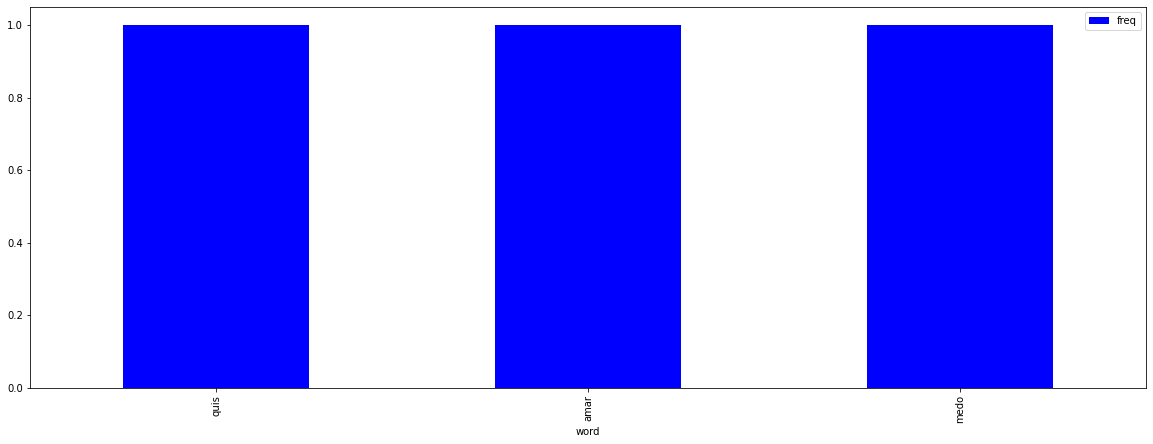

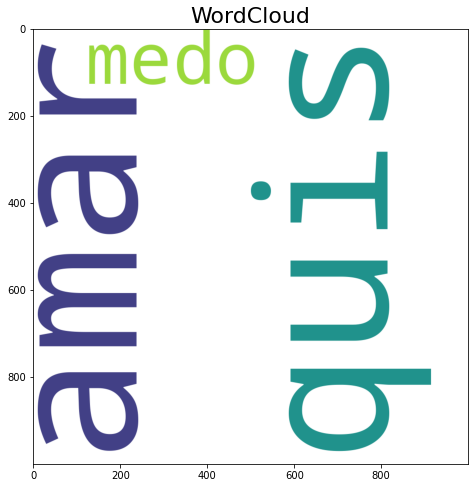

In [4]:
def WordDistribution(collection, top):
  cv = CountVectorizer(stop_words = stopwords)
  words = cv.fit_transform(collection)
  sum_words = words.sum(axis=0)

  words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

  frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

  frequency.head(top).plot(x='word', y='freq', kind='bar', figsize=(20, 7), color = 'blue')
  wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))
  plt.figure(figsize=(20,8))
  plt.imshow(wordcloud)
  plt.title("WordCloud", fontsize = 22)
WordDistribution({"Eu quis amar, mas tive medo."}, 5)

# Importando dicionário léxico OpenLexicon 
(https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/oplexicon/)

In [5]:
csvfile = pd.read_csv("https://drive.google.com/uc?id=1iUCi4LRaOnHpcthw86KpuYqNzFKlcpZn&export=download", low_memory=False)
print(csvfile.shape)
dict_oplexicon = {}
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[2]
  dict_oplexicon[palavra] = polaridade

(32190, 4)


# Importando dicionário léxico SenticNet 
(https://sentic.net/downloads/)

In [6]:
csvfile = pd.read_csv("https://drive.google.com/u/2/uc?id=1EoLu8xwWGUHclwyupH-wRDnvZpXAeETV&export=download", low_memory=False)
print(csvfile.shape)
dict_senticnet = {}
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_senticnet[palavra] = polaridade

(22597, 2)


# UNILEX

In [7]:
csvfile = pd.read_csv("https://drive.google.com/u/2/uc?id=1AViTEwjiwCwh2yoiCeNd-hjx2ysN5xxO&export=download", low_memory=False)
print(csvfile.shape)
dict_unilex = {}
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_unilex[palavra] = polaridade

(3844, 2)


# WordNetAffectBr
https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/wordnetaffectbr/

In [8]:
csvfile = pd.read_csv("https://drive.google.com/u/2/uc?id=18q63AB7uSVIyRMENi4Dgx9Kchn-yv_pe&export=download", low_memory=False)
print(csvfile.shape)
dict_wordnetaffectbr = {}
for index, row in csvfile.iterrows():
  palavra = row[0]
  polaridade = row[1]
  dict_wordnetaffectbr[palavra] = polaridade

(288, 2)


# Funções para análise de sentimento

In [9]:
#Pré-processamento
def Preprocessamento(texto) :
    texto = str(texto)
    texto = texto.lower()
    #documento = word_tokenize(texto)
    documento = nlp(texto)
    #documento = tokenize.word_tokenize(texto, language='portuguese')
    lista = []
    #Tokenizacao
    for token in documento:
        lista.append(token.lemma_)
        #print(lemmas.lemmatize(token)) Não funciona pt-br
    lista = [palavra for palavra in lista if palavra not in stopwords and palavra not in pontuacao and not palavra.isdigit()] # retira stopwords
    #lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()]) # retira digitos
    return lista
#
#POLARIDADE DA PALAVRA
#
def Polaridade (frase, dicionario):
    frasepolaridade = []
    for i in frase:
        polaridade = (float(dicionario.get(i,0)))
        #frasepolaridade.append(float(dicionario.get(i, 0)))
        frasepolaridade.append(polaridade)
        #print(frasepolaridade)
    score = sum(frasepolaridade)
    return score
#
#ANALISE DE SENTIMENTO
#
def AnalisarSentimento(frase, dicionario):
    #print('Frase: ' + frase)
    fraseprocessada = Preprocessamento(frase)
    fraseprocessada2 = ' '.join([str(elemento) for elemento in fraseprocessada])
    scorefrase = Polaridade(fraseprocessada, dicionario)
    return scorefrase
frase_teste = "Eu queria amar, mas tive medo"
# comparando polaridades utilizando diferentes dicionarios
print("A polaridade da frase '", frase_teste, "' segundo o dicionário oplexicon é:", AnalisarSentimento(frase_teste, dict_oplexicon))
print("A polaridade da frase '", frase_teste, "' segundo o dicionário senticnet é:", AnalisarSentimento(frase_teste, dict_senticnet))
print("A polaridade da frase '", frase_teste, "' segundo o dicionário unilex é:", AnalisarSentimento(frase_teste, dict_unilex))
print("A polaridade da frase '", frase_teste, "' segundo o dicionário wordnetaffectbr é:", AnalisarSentimento(frase_teste, dict_wordnetaffectbr))
## após analisar os dicionários, decidir usar um mix de 2 deles, oplexicon e senticnet
print("A polaridade da frase '", frase_teste, "' segundo o dicionário combinados oplexicon e senticnet é:", AnalisarSentimento(frase_teste, dict(dict_oplexicon, **dict_senticnet)))

A polaridade da frase ' Eu queria amar, mas tive medo ' segundo o dicionário oplexicon é: 2.0
A polaridade da frase ' Eu queria amar, mas tive medo ' segundo o dicionário senticnet é: 1.587
A polaridade da frase ' Eu queria amar, mas tive medo ' segundo o dicionário unilex é: -8.0
A polaridade da frase ' Eu queria amar, mas tive medo ' segundo o dicionário wordnetaffectbr é: -1.0
A polaridade da frase ' Eu queria amar, mas tive medo ' segundo o dicionário combinados oplexicon e senticnet é: 1.587


# Importando Dados do CSV

In [10]:
#colab_events_url = "https://drive.google.com/uc?id=1d1ZZ1ramHTjnOOnSc_sdcKEQm2si1Lib&export=download" # #2020-2022 Niteroi - Clean
colab_events_url = "https://drive.google.com/uc?id=1pC9m4-k4e_I98MA_8G9mF-h6wCntd1Qu&export=download" # All data full events - Clean
colab_events = pd.read_csv(colab_events_url, low_memory=False)
print(colab_events.shape)
def CreateDatasetFromColabEvents(df):
  dataset = df.copy()
  del dataset["status"]
  del dataset["created_at"]
  del dataset["event_type_id"]
  del dataset["event_type_name"]
  return dataset

(328403, 7)


# Ajustando motor de sentimento
Testando o motor de análise de sentimento com algumas frases de exemplo obtidas a partir do csv de eventos. 

Como resultado desse experimento, foram identificadas algumas palavras que tem uma polarizaçao importante no contexto do colab, mas que não estão incluídas no dicionário lexico original. Aqui elas foram adicionadas manualmente com scores de -1 a 1 dependendo da polaridade da palavra no contexto de postagens no colab.

In [11]:
lexicon=dict(dict_oplexicon, **dict_senticnet)
def printLexicon(palavra):
  print(palavra, ": ", lexicon.get(palavra, None))
#
def printLexiconPhrase(frase):
  phrases = {}
  for palavra in frase.lower().translate(frase.maketrans('', '', string.punctuation)).split(" "):
    phrases[palavra.strip()] = lexicon.get(palavra.strip(), None)
  print(phrases)
#
def addLexicon(palavra, valor):
  lexicon[palavra] = valor
## adicionando palavras extras e corrigindo valores de palavras
addLexicon("colabora", 1);
addLexicon("rua", 1);
addLexicon("iptu", -1);
addLexicon("prefeito", -1);
addLexicon("prefeitos", -1);
addLexicon("irregulares", -1);
addLexicon("indesejadas",-1);
addLexicon("bastasse", -1);
addLexicon("pública", 1);
addLexicon("horrorosas", -1);
addLexicon("indigência", -1);
addLexicon("inadequados", -1);
addLexicon("pt", -1);
addLexicon("psdb", -1);
addLexicon("pdt", -1);
addLexicon("corrupção", -1);
addLexicon("varias", -1);
addLexicon("árvore", 1);
addLexicon("urgente", 1);
addLexicon("número", 1);
addLexicon("frente", 1);
addLexicon("façam", -1);
addLexicon("asfaltem ", -1);
addLexicon("prefeitura", 0.5);
addLexicon("sofreu ", -1);
addLexicon("extremamente", -1);
addLexicon("mal", -1);
addLexicon("dejetos", -1);
addLexicon("vistoria", -1);
addLexicon("responsabilidade", -1);
addLexicon("secretaria ", -1);
addLexicon("providência", -1);
addLexicon("gargalhadas", -1);
addLexicon("barulho", -1);
addLexicon("botequim", -1);
addLexicon("colab", -1);
addLexicon("algazarra", -1);
addLexicon("descaso", -1);
addLexicon("deveria", -1);
addLexicon("providências", -1);
addLexicon("reclamação", -1);
addLexicon("irrespirável", -1);
addLexicon("recorrentes", -1);
addLexicon("irregularidade", -1);
addLexicon("irregularidades", -1);
addLexicon("trabalhando", 1);
addLexicon("trabalhado", 1);
addLexicon("transparente", 1);
addLexicon("resolver", 0.5);
addLexicon("problemas", 0.5);
addLexicon("obstáculos", -1)
addLexicon("abismo", -1)
addLexicon("descumprimento", -1)
##
frase_teste = "Isso é culpa dos prefeitos que não ligam para a população"
print("Polaridade da frase '", frase_teste, "':", AnalisarSentimento(frase_teste, lexicon))
print("BREAKDOWN LEXICO")
printLexiconPhrase(frase_teste)
print("")
##
frase_teste = "Eu pago meu IPTU em dia é um absurdo isso acontecer"
print("Polaridade da frase '", frase_teste, "':", AnalisarSentimento(frase_teste, lexicon))
print("BREAKDOWN LEXICO")
printLexiconPhrase(frase_teste)
print("")
##
frase_teste = "Parabéns a prefeitura que tem trabalhado de uma forma transparente para resolver os problemas da cidade"
print("Polaridade da frase '", frase_teste, "':", AnalisarSentimento(frase_teste, lexicon))
print("BREAKDOWN LEXICO")
printLexiconPhrase(frase_teste)
print("")
#
frase_teste = "Fiação sem vergonha na Vila Olímpia. Fios caem até o chão, pondo em perigo a segurança do pedestre."
print("Polaridade da frase '", frase_teste, "':", AnalisarSentimento(frase_teste, lexicon))
print("BREAKDOWN LEXICO")
printLexiconPhrase(frase_teste)
print("")
#
frase_teste = "Calçadão de Boa Viagem com várias depressões e buracos causados por infiltração de água"
print("Polaridade da frase '", frase_teste, "':", AnalisarSentimento(frase_teste, lexicon))
print("BREAKDOWN LEXICO")
printLexiconPhrase(frase_teste)
print("")
#
frase_teste = "O descumprimento da política nacional de mobilidade (LEI Nº 12.587, DE 3 DE JANEIRO DE 2012) é evidente nessa intervenção feita na ponte paulo guerra. Não basta o resto da calçada da ponte estar esburacada e cheia de obstáculos, é preciso também abrir um abismo para o pedestre ter que ultrapassar. Essa alça construída para dar acesso ao shopping riomar é imoral e com certeza haverá atropelamentos, que chamarão de ""acidentes"". Não será acidente, será apenas o fruto de uma infraestrutura toda voltada para o fluxo de automóveis individuais em detrimento do pedestre em descumprimento a lei federal. Infelizmente o ministério público não intervém nesse caso. Ainda estamos muito longe de atingir a acessibilidade universal."
print("Polaridade da frase '", frase_teste, "':", AnalisarSentimento(frase_teste, lexicon))
print("BREAKDOWN LEXICO")
printLexiconPhrase(frase_teste)
print("")

Polaridade da frase ' Isso é culpa dos prefeitos que não ligam para a população ': -0.77
BREAKDOWN LEXICO
{'isso': None, 'é': None, 'culpa': -0.429, 'dos': None, 'prefeitos': -1, 'que': None, 'não': None, 'ligam': None, 'para': None, 'a': None, 'população': 0.038}

Polaridade da frase ' Eu pago meu IPTU em dia é um absurdo isso acontecer ': -1.3290000000000002
BREAKDOWN LEXICO
{'eu': None, 'pago': 0, 'meu': None, 'iptu': -1, 'em': None, 'dia': 0.769, 'é': None, 'um': -0.99, 'absurdo': -1, 'isso': None, 'acontecer': 0.0}

Polaridade da frase ' Parabéns a prefeitura que tem trabalhado de uma forma transparente para resolver os problemas da cidade ': 1.084
BREAKDOWN LEXICO
{'parabéns': 0.947, 'a': None, 'prefeitura': 0.5, 'que': None, 'tem': 0.702, 'trabalhado': 1, 'de': 0.84, 'uma': None, 'forma': 0.101, 'transparente': 1, 'para': None, 'resolver': 0.5, 'os': None, 'problemas': 0.5, 'da': None, 'cidade': 0.0}

Polaridade da frase ' Fiação sem vergonha na Vila Olímpia. Fios caem até o chã

# Loop de análise de sentimento de post de eventos do Colab
Nesse step, fazemos um loop no dataset de eventos, classificando as postagens utilizando o motor de analise de sentimento. A partir dessa lista de scores, vamos selecionar os top 1000 piores e top 1000 melhores scores para usar como treinamento para o robô de ML.

In [12]:
dataset = CreateDatasetFromColabEvents(colab_events)
post_scores = []
for index, row in dataset.iterrows():
  post = row[2]
  post_scores.append(AnalisarSentimento(post, lexicon))
dataset["score"] = post_scores

# Função para normalizaçao do score apos filtragem

In [13]:
from sklearn import preprocessing
##
def NormalizeScoreByLength(df):
  for col in df.columns:
    if(col == 'score'):
      df[col].update((df[col] - df[col].min()) / (df[col].max() - df[col].min()))
##

# Filtrando piores Scores

In [14]:
# obtendo os 1000 primeiros registros com piores scores
worst_scores = dataset.sort_values(by='score', ascending=True).head(2500)
# exibindo os 10 piores scores
worst_scores.head(10)

,event_id,user_id,description,score
296353,341145.0,380494.0,"Esse trecho da rua São João, entre as ruas Vis...",-11.717
185967,220629.0,316442.0,Moradores dos condominios ao redor do Posto Ip...,-11.478
141265,169518.0,249968.0,nos aqui da região vamos continuar insistindo ...,-11.158
38636,50837.0,125536.0,Vasos colocados irregularmente nas vagas desti...,-10.739
202703,238846.0,276570.0,"Rua Vereador José Fernandes, no bairro de Sant...",-10.674
74418,95796.0,128160.0,"Cúmulo, em plena Praia de Piratininga um conju...",-10.448
249812,289608.0,200307.0,"Calçada irregular, fora de nível das calçadas,...",-10.422
209950,246633.0,128160.0,como passat na via xavier diante de tanta irre...,-9.889
209951,246634.0,128160.0,como passat na via xavier diante de tanta irre...,-9.889
314258,360146.0,661707.0,é uma absurdo o que acontece nesse sinal dessa...,-9.764


# Piores Scores - Distribuição de palavras
Visualizando nuvem de palavras mais usadas nas postagens com piores scores

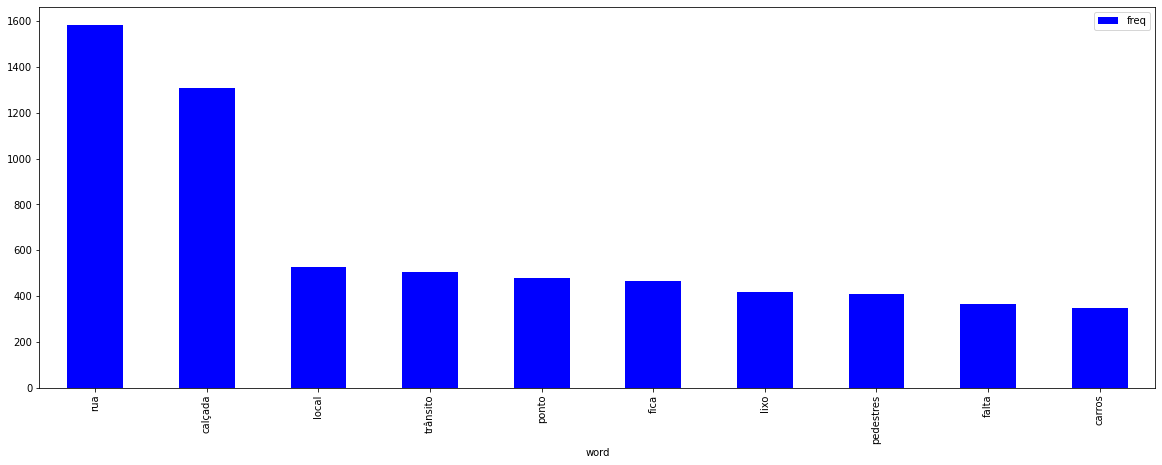

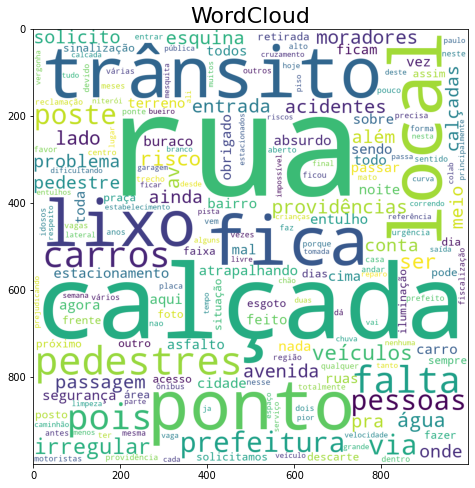

In [15]:
WordDistribution(worst_scores.description, 10)

# Piores scores - Exemplo de Mapa Sintatico de uma postagem

In [16]:
MapaSintatico(worst_scores['description'].values[0])

# Piores scores - Valores associados a cada palavra da postagem

In [17]:
printLexiconPhrase(worst_scores['description'].values[0])

{'esse': None, 'trecho': None, 'da': None, 'rua': 1, 'são': 0.203, 'joão': None, 'entre': None, 'as': None, 'ruas': None, 'visconde': None, 'de': 0.84, 'itaboraí': None, 'e': None, 'do': None, 'uruguai': None, 'não': None, 'bastasse': -1, 'a': None, 'indigência': -1, 'dos': None, 'que': None, 'ali': None, 'habitam': None, 'ou': None, 'têm': None, 'seus': None, 'comércios': None, 'irregulares': -1, 'por': None, 'falta': -0.543, 'melhor': 0.135, 'opção': None, 'temos': None, 'várias': None, 'figueiras': None, 'horrorosas': -1, 'estragam': None, 'calçadas': None, 'até': 0.889, 'via': 0.021, 'pública': 1, 'atualmente': None, 'estão': None, 'perdendo': None, 'folhas': 0.0, 'o': None, 'colabora': 1, 'para': None, 'sujar': -0.717, 'ainda': 0.0, 'mais': None, 'essa': None, 'ótimas': 1, 'entupir': -0.71, 'os': None, 'raros': 1, 'bueiros': None, 'quando': None, 'chove': None, 'drenam': None, 'águas': None, 'pluviais\na': None, 'sugestão': 0.0, 'é': None, 'erradiquem': None, 'essas': None, 'espéc

# Melhores Scores

In [18]:
#best_scores = dataset.sort_values(by='score', ascending=False).head(int(len(dataset.index)/2))
best_scores = dataset.sort_values(by='score', ascending=False).head(2500)
best_scores

,event_id,user_id,description,score
187790,222630.0,310177.0,PROCESSO Nº 5259/1946 – Em análise de Alteraçõ...,129.283
180210,214052.0,308915.0,Venho solicitar à Prefeitura de Juiz de Fora-M...,57.099
279270,322833.0,416662.0,"Prezado Responsável, \n\nEu, Rhayene Coelho de...",55.604
279272,322835.0,416662.0,"Prezado Responsável, \n\nEu, Rhayene Coelho de...",55.604
155776,185542.0,199306.0,"O artigo art. 112 da Lei nº 2.624/2008, que in...",54.547
...,...,...,...,...
206971,243444.0,332699.0,ocorencia na rua jose de alvarenga filho santa...,10.228
234845,273715.0,360377.0,"Fica no final da rua Voltaire, esquina com a v...",10.227
20722,28055.0,89932.0,frota de ônibus da cidade totalmente em mal es...,10.227
229366,267924.0,202910.0,"esse endereço acima n está coreto,eu digitei a...",10.227


# Melhores scores - Valores associados a cada palavra da postagem

In [19]:
printLexiconPhrase(best_scores['description'].values[0])

{'processo': 0.804, 'nº': None, '52591946': None, '–': None, 'em': None, 'análise': 0.0, 'de': 0.84, 'alterações\r\n\r\ndestinatário': None, 'responsável': 0.806, 'pela': None, 'saudlusaap\r\n\r\n\r\ndenunciada': None, 'construtora': None, 'cristo': None, 'redentor': 0, 'ltdacnpj': None, '26001149000189\r\n\r\nresponsabilidade': None, 'técnica': 0.967, 'djalma': None, 'fonseca': None, 'crea': None, '45036d': None, 'mg\r\nprocesso': None, '': None, 'projeto': 0.986, 'aprovado': 0.585, 'pelo': None, '392': None, '22082017\r\nendereço': None, 'obra': None, 'rua': 1, 'barão': 0.066, 'cataguases': None, '471': None, 'esquina': 0.0, 'c': None, 'olegário': None, 'maciel': None, 'nº30': None, 'bairro': 0.0, 'santa': 1, 'helena': None, 'cep': None, '36015370\r\n\r\ndenúncia': None, 'irregular': -0.583, 'desacordo': None, 'com': None, 'o': None, 'prefeitura': 0.5, 'municipal': None, 'ao': None, 'setor': None, 'e': None, 'alterações\r\n\r\ncomo': None, 'representante': 0.939, 'do': None, 'condomí

# Melhores Scores - Distribuição de palavras
Visualizando nuvem de palavras mais usadas nas postagens com melhores scores

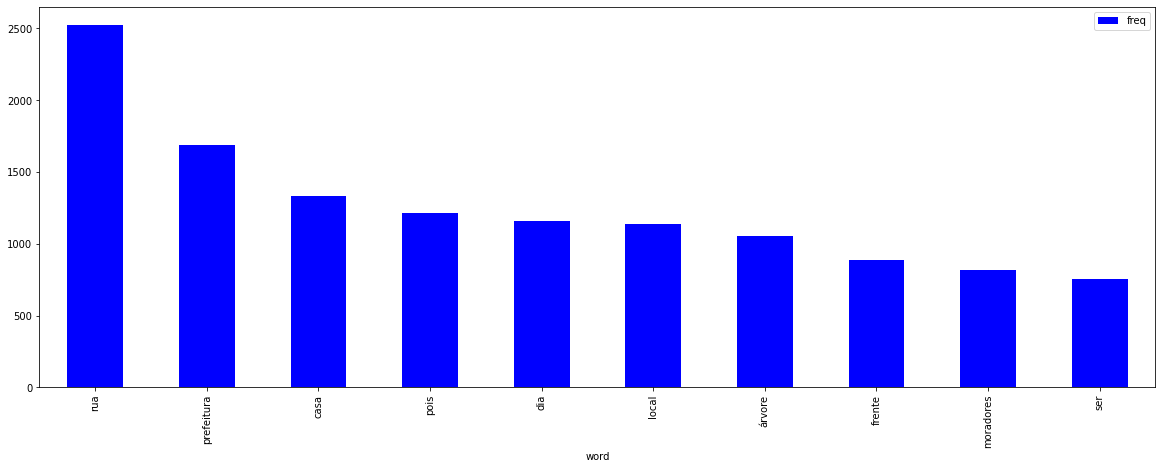

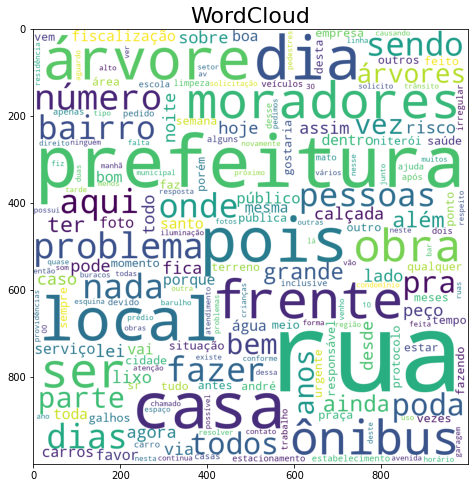

In [20]:
WordDistribution(best_scores.description, 10)

# Melhores scores - Exemplo de Mapa Sintatico de uma postagem

In [21]:
MapaSintatico(best_scores['description'].values[0])

# Concatenando DataFrames e normalizando scores

In [22]:
frames = [worst_scores, best_scores]
result = pd.concat(frames).drop_duplicates().reset_index(drop=True).sort_values(by='score', ascending=True)
##NormalizeScoreByLength(result)
result

,event_id,user_id,description,score
0,341145.0,380494.0,"Esse trecho da rua São João, entre as ruas Vis...",-11.717
1,220629.0,316442.0,Moradores dos condominios ao redor do Posto Ip...,-11.478
2,169518.0,249968.0,nos aqui da região vamos continuar insistindo ...,-11.158
3,50837.0,125536.0,Vasos colocados irregularmente nas vagas desti...,-10.739
4,238846.0,276570.0,"Rua Vereador José Fernandes, no bairro de Sant...",-10.674
...,...,...,...,...
2504,185542.0,199306.0,"O artigo art. 112 da Lei nº 2.624/2008, que in...",54.547
2502,322833.0,416662.0,"Prezado Responsável, \n\nEu, Rhayene Coelho de...",55.604
2503,322835.0,416662.0,"Prezado Responsável, \n\nEu, Rhayene Coelho de...",55.604
2501,214052.0,308915.0,Venho solicitar à Prefeitura de Juiz de Fora-M...,57.099


# Salvando DataFrame como CSV

In [23]:
from google.colab import files

result.to_csv('colab_sentiment_training.csv', encoding = 'utf-8-sig', index=False) 
files.download('colab_sentiment_training.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>